# Análisis de Delitos

Objetivo:
* Implementar un modelo del clasificación para el análsis de delitos en la Ciudad de México
* Datos: https://datos.cdmx.gob.mx/dataset/victimas-en-carpetas-de-investigacion-fgj

## Bibliotecas y setup

In [1]:
# Dependencies
import pandas as pd 
pd.set_option('display.max_columns', 100)
import numpy as np 
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#
import warnings 
warnings.filterwarnings('ignore') # Para ignorar warnings

### Nota: Si alguna biblioteca no se instala utilizar el siguiente código

In [2]:
# 
#!pip install pip # Cuando utilicen por primera vez pip
#!pip install <<name_library>>

## SECCIÓN I:

### ¿Qué nos dicen los datos? 

Se trata de datos que contienen la información actualizada de las víctimas de los delitos en las carpetas de investigación de la Fiscalía General de Justicia (FGJ) de la Ciudad de México a partir de enero de 2019.

Para una correcta interpretación de la información, la CDMX hizó las siguientes aclaraciones:

* El campo "fecha_hecho" representa la fecha en la que ocurrió el hecho.
* El campo "fecha_inicio" corresponde a la fecha de la apertura de la carpeta de investigación.
* En esta base se señala el sexo de la víctima, así como la fecha en que ocurrieron los hechos denunciados.
* Es importante destacar que, aunque en algunas ocasiones la víctima es la persona denunciante, en otras, denunciante y víctima son personas diferentes (por ejemplo, casos en los que menores de edad son víctimas).
* Es posible que en una misma denuncia se incluya a una o más víctimas.
* Existen otras aclaraciones en: https://datos.cdmx.gob.mx/dataset/victimas-en-carpetas-de-investigacion-fgj

**Los datos de esta tabla fueron actualizados por la FGJ el 29 de julio de 2020.**

Los datos antes de la actualización del 29 de julio de 2020 los puedes consultar en esta liga: Victimas antes de la actualización de julio de 2020 [https://archivo.datos.cdmx.gob.mx/fiscalia-general-de-justicia/victimas-en-carpetas-de-investigacion-fgj/victimas_ss_junio2020.csv]

In [2]:
# Consulta a una dirección Web que aloja un archivo CSV (DATOS ACTUALIZADOS)

Datos = pd.read_csv('https://archivo.datos.cdmx.gob.mx/FGJ/victimas/victimasFGJ_acumulado_2023_12.csv')

Datos.tail()

,anio_inicio,mes_inicio,fecha_inicio,hora_inicio,anio_hecho,mes_hecho,fecha_hecho,hora_hecho,delito,categoria_delito,sexo,edad,tipo_persona,calidad_juridica,competencia,colonia_hecho,colonia_catalogo,alcaldia_hecho,alcaldia_catalogo,municipio_hecho,latitud,longitud
1229053,2023.0,Noviembre,2023-11-06,13:56:48,2023.0,Noviembre,2023-11-04,18:30:00,ROBO A TRANSEUNTE EN VIA PUBLICA SIN VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,Femenino,24.0,FISICA,DENUNCIANTE Y VICTIMA,FUERO COMUN,CENTRO,Centro,CUAUHTEMOC,Cuauhtémoc,CDMX,19.436845,-99.144824
1229054,2023.0,Noviembre,2023-11-09,07:18:30,2023.0,Noviembre,2023-11-09,06:50:00,HOMICIDIO POR ARMA DE FUEGO,HOMICIDIO DOLOSO,Masculino,25.0,FISICA,CADAVER,FUERO COMUN,GUERRERO,Guerrero,CUAUHTEMOC,Cuauhtémoc,CDMX,19.439789,-99.147182
1229055,2023.0,Noviembre,2023-11-20,14:03:16,2023.0,Noviembre,2023-11-19,14:00:00,"ROBO S/V DENTRO DE NEGOCIOS, AUTOSERVICIOS, CO...",DELITO DE BAJO IMPACTO,Masculino,36.0,FISICA,DENUNCIANTE Y VICTIMA,FUERO COMUN,ZONA CENTRO,Zona Centro,VENUSTIANO CARRANZA,Venustiano Carranza,CDMX,19.431635,-99.122493
1229056,2023.0,Noviembre,2023-11-21,14:00:09,2023.0,Noviembre,2023-11-21,13:00:00,HOMICIDIO POR GOLPES,HOMICIDIO DOLOSO,Masculino,63.0,FISICA,CADAVER,FUERO COMUN,PROVIDENCIA,Providencia,AZCAPOTZALCO,Azcapotzalco,CDMX,19.492141,-99.213710
1229057,2023.0,Noviembre,2023-11-22,14:36:09,2023.0,Noviembre,2023-11-22,12:20:00,SECUESTRO EXPRESS (PARA COMETER ROBO O EXTORSIÓN),DELITO DE BAJO IMPACTO,Masculino,40.0,FISICA,DENUNCIANTE Y VICTIMA,FUERO COMUN,LOS REYES CULHUACÁN,Pueblo Los Reyes Culhuacan,IZTAPALAPA,Iztapalapa,CDMX,19.345765,-99.108368


In [3]:
#

Datos.shape

(1229058, 22)

In [4]:
#

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229058 entries, 0 to 1229057
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   anio_inicio        1229057 non-null  float64
 1   mes_inicio         1229057 non-null  object 
 2   fecha_inicio       1229057 non-null  object 
 3   hora_inicio        1229057 non-null  object 
 4   anio_hecho         1228664 non-null  float64
 5   mes_hecho          1228664 non-null  object 
 6   fecha_hecho        1228663 non-null  object 
 7   hora_hecho         1228674 non-null  object 
 8   delito             1229058 non-null  object 
 9   categoria_delito   1229058 non-null  object 
 10  sexo               1010805 non-null  object 
 11  edad               803811 non-null   float64
 12  tipo_persona       1221922 non-null  object 
 13  calidad_juridica   1229057 non-null  object 
 14  competencia        1229058 non-null  object 
 15  colonia_hecho      1166973 non-n

In [5]:
# Consulta a una dirección Web que aloja un archivo CSV (DATOS NO ACTUALIZADOS)

Datos_OLD = pd.read_csv('https://archivo.datos.cdmx.gob.mx/fiscalia-general-de-justicia/victimas-en-carpetas-de-investigacion-fgj/victimas_ss_junio2020.csv')

Datos_OLD.tail()

,idCarpeta,Año_inicio,Mes_inicio,FechaInicio,Delito,Categoria,Sexo,Edad,TipoPersona,CalidadJuridica,competencia,Año_hecho,Mes_hecho,FechaHecho,HoraHecho,HoraInicio,AlcaldiaHechos,ColoniaHechos,Calle_hechos,Calle_hechos2,latitud,longitud
369734,8711995,2020,Junio,30/06/2020,FRAUDE,DELITO DE BAJO IMPACTO,Femenino,56.0,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2020.0,Junio,29/06/2020,03:30:00,23:39:00,ALVARO OBREGON,AXOTLA,AV UNIVERSIDAD,INDUSTRIA,19.358334,-99.172309
369735,8711983,2020,Junio,30/06/2020,NEGACION DEL SERVICIO PUBLICO,DELITO DE BAJO IMPACTO,Masculino,NaN,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2019.0,Diciembre,20/12/2019,22:30:00,23:46:00,ALVARO OBREGON,PROGRESO,AV- MEMXICO,AV. TOLUCA Y TLAXCALA (FISCALIA DE INVESTIGACI...,19.339645,-99.201685
369736,8711983,2020,Junio,30/06/2020,NEGACION DEL SERVICIO PUBLICO,DELITO DE BAJO IMPACTO,Femenino,NaN,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2019.0,Diciembre,20/12/2019,22:30:00,23:46:00,ALVARO OBREGON,PROGRESO,AV- MEMXICO,AV. TOLUCA Y TLAXCALA (FISCALIA DE INVESTIGACI...,19.339645,-99.201685
369737,8711980,2020,Junio,30/06/2020,AMENAZAS,DELITO DE BAJO IMPACTO,Femenino,NaN,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2020.0,Junio,30/06/2020,18:40:00,23:47:00,CUAUHTEMOC,GUERRERO,PEDRO MORENO,AV. PASEO DE LA REFORMA,19.441199,-99.143585
369738,8711986,2020,Junio,30/06/2020,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,Femenino,28.0,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2020.0,Junio,30/06/2020,21:30:00,23:55:00,IZTACALCO,SANTIAGO SUR,PLAYA NIZUC,AV. AMACUZAC,19.389455,-99.127101


In [6]:
#

Datos_OLD.shape

(369739, 22)

In [7]:
#

Datos_OLD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369739 entries, 0 to 369738
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   idCarpeta        369739 non-null  int64  
 1   Año_inicio       369739 non-null  int64  
 2   Mes_inicio       369739 non-null  object 
 3   FechaInicio      369739 non-null  object 
 4   Delito           369739 non-null  object 
 5   Categoria        369739 non-null  object 
 6   Sexo             291714 non-null  object 
 7   Edad             231640 non-null  float64
 8   TipoPersona      366355 non-null  object 
 9   CalidadJuridica  369739 non-null  object 
 10  competencia      369739 non-null  object 
 11  Año_hecho        369492 non-null  float64
 12  Mes_hecho        369492 non-null  object 
 13  FechaHecho       369492 non-null  object 
 14  HoraHecho        369494 non-null  object 
 15  HoraInicio       369738 non-null  object 
 16  AlcaldiaHechos   369724 non-null  obje

In [17]:
# Agrupamos por año-mes y categoria_delito de los DATOS ACTUALIZADOS

Datos['Periodo'] = Datos['fecha_hecho'].str[:7]

Time_Serie = Datos[ ['Periodo', 'categoria_delito', 
                     'anio_inicio'] ].groupby(by = ['Periodo', 
                                                    'categoria_delito']).count().reset_index( drop = False)

Time_Serie = Time_Serie[ Time_Serie['Periodo'] >= '2019-01' \
                       ].reset_index( drop = True ).rename( columns = {'categoria_delito': 'Categoria', 
                                                                       'anio_inicio' : 'Numero'} )

Time_Serie

,Periodo,Categoria,Numero
0,2019-01,DELITO DE BAJO IMPACTO,16524
1,2019-01,HECHO NO DELICTIVO,311
2,2019-01,HOMICIDIO DOLOSO,172
3,2019-01,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,161
4,2019-01,ROBO A CASA HABITACIÓN CON VIOLENCIA,60
...,...,...,...
939,2023-12,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,99
940,2023-12,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,697
941,2023-12,ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA,4
942,2023-12,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,556


In [18]:
#

Time_Serie = pd.pivot_table( Time_Serie, values = 'Numero', index = ['Periodo'], 
                             columns = ['Categoria'], aggfunc = 'sum' ).reset_index( drop = False )

Time_Serie

Categoria,Periodo,DELITO DE BAJO IMPACTO,HECHO NO DELICTIVO,HOMICIDIO DOLOSO,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,ROBO A CASA HABITACIÓN CON VIOLENCIA,ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA,ROBO A NEGOCIO CON VIOLENCIA,ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA,ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA,ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SECUESTRO,VIOLACIÓN
0,2019-01,16524.0,311.0,172.0,161.0,60.0,52.0,1713.0,159.0,39.0,343.0,392.0,1309.0,10.0,1285.0,17.0,123.0
1,2019-02,15728.0,356.0,152.0,170.0,81.0,53.0,1308.0,133.0,49.0,424.0,312.0,1796.0,12.0,1163.0,2.0,120.0
2,2019-03,17716.0,279.0,191.0,171.0,69.0,63.0,1317.0,128.0,40.0,389.0,357.0,1799.0,13.0,1237.0,8.0,136.0
3,2019-04,16520.0,301.0,157.0,174.0,66.0,56.0,1256.0,105.0,25.0,375.0,313.0,1638.0,13.0,1275.0,1.0,152.0
4,2019-05,18185.0,327.0,213.0,166.0,69.0,66.0,1158.0,126.0,34.0,382.0,328.0,1552.0,16.0,1302.0,8.0,140.0
5,2019-06,17235.0,268.0,156.0,128.0,60.0,62.0,1093.0,125.0,25.0,272.0,282.0,1365.0,10.0,1189.0,8.0,121.0
6,2019-07,16948.0,258.0,161.0,126.0,74.0,74.0,1394.0,89.0,34.0,222.0,275.0,1242.0,10.0,1141.0,8.0,127.0
7,2019-08,17935.0,297.0,120.0,136.0,65.0,72.0,1144.0,100.0,38.0,167.0,363.0,1396.0,9.0,1106.0,4.0,147.0
8,2019-09,16920.0,296.0,147.0,150.0,61.0,57.0,1032.0,91.0,30.0,170.0,373.0,1246.0,13.0,1099.0,3.0,156.0
9,2019-10,15497.0,310.0,136.0,140.0,65.0,52.0,452.0,82.0,38.0,168.0,406.0,1160.0,16.0,982.0,6.0,179.0


In [19]:
# Agrupamos por año-mes y categoria_delito de los DATOS NO ACTUALIZADOS

Datos_OLD['Periodo'] = Datos_OLD['FechaHecho'].str[6:10] + '-' + Datos_OLD['FechaHecho'].str[3:5]

Time_Serie_OLD = Datos_OLD[ ['Periodo', 'Categoria', 
                             'idCarpeta'] ].groupby(by = ['Periodo', 
                                                          'Categoria']).count().reset_index( drop = False)

Time_Serie_OLD = Time_Serie_OLD[ Time_Serie_OLD['Periodo'] >= '2019-01'\
                               ].reset_index( drop = True ).rename( columns = {'idCarpeta' : 'Numero'} )

Time_Serie_OLD

,Periodo,Categoria,Numero
0,2019-01,DELITO DE BAJO IMPACTO,16053
1,2019-01,HECHO NO DELICTIVO,306
2,2019-01,HOMICIDIO DOLOSO,172
3,2019-01,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,161
4,2019-01,ROBO A CASA HABITACIÓN CON VIOLENCIA,60
...,...,...,...
282,2020-06,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,131
283,2020-06,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,596
284,2020-06,ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA,11
285,2020-06,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,750


In [20]:
#

Time_Serie_OLD = pd.pivot_table( Time_Serie_OLD, values = 'Numero', index = ['Periodo'], 
                                 columns = ['Categoria'], aggfunc = 'sum' ).reset_index( drop = False )

Time_Serie_OLD

Categoria,Periodo,DELITO DE BAJO IMPACTO,HECHO NO DELICTIVO,HOMICIDIO DOLOSO,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,ROBO A CASA HABITACIÓN CON VIOLENCIA,ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA,ROBO A NEGOCIO CON VIOLENCIA,ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA,ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA,ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SECUESTRO,VIOLACIÓN
0,2019-01,16053.0,306.0,172.0,161.0,60.0,52.0,1713.0,159.0,39.0,343.0,392.0,1309.0,10.0,1284.0,17.0,91.0
1,2019-02,15403.0,353.0,152.0,170.0,81.0,53.0,1308.0,132.0,49.0,424.0,312.0,1795.0,12.0,1161.0,2.0,104.0
2,2019-03,17370.0,275.0,191.0,171.0,69.0,63.0,1317.0,128.0,39.0,387.0,357.0,1799.0,13.0,1235.0,8.0,124.0
3,2019-04,16161.0,297.0,157.0,174.0,66.0,56.0,1255.0,105.0,25.0,375.0,313.0,1636.0,13.0,1274.0,1.0,139.0
4,2019-05,17785.0,321.0,213.0,166.0,69.0,66.0,1158.0,126.0,34.0,382.0,327.0,1550.0,16.0,1302.0,8.0,124.0
5,2019-06,16744.0,254.0,155.0,128.0,60.0,62.0,1093.0,125.0,25.0,272.0,282.0,1363.0,10.0,1184.0,8.0,109.0
6,2019-07,16523.0,252.0,161.0,126.0,74.0,74.0,1394.0,89.0,34.0,222.0,275.0,1241.0,10.0,1139.0,8.0,118.0
7,2019-08,17451.0,294.0,120.0,136.0,65.0,72.0,1144.0,100.0,38.0,166.0,363.0,1394.0,9.0,1103.0,4.0,128.0
8,2019-09,16325.0,291.0,147.0,150.0,60.0,57.0,1032.0,91.0,30.0,169.0,373.0,1242.0,13.0,1096.0,3.0,139.0
9,2019-10,14823.0,302.0,136.0,140.0,65.0,52.0,452.0,82.0,38.0,168.0,406.0,1157.0,16.0,978.0,6.0,155.0


In [21]:
#

Time_Serie = Time_Serie.drop('HECHO NO DELICTIVO', axis=1)
Time_Serie = Time_Serie.drop('SECUESTRO', axis=1)
Time_Serie = Time_Serie.drop('HOMICIDIO DOLOSO', axis=1)
Time_Serie = Time_Serie.drop('VIOLACIÓN', axis=1)
Time_Serie = Time_Serie.drop('LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO', axis=1)
Time_Serie = Time_Serie.drop('ROBO A CASA HABITACIÓN CON VIOLENCIA', axis=1)
Time_Serie = Time_Serie.drop('ROBO A NEGOCIO CON VIOLENCIA', axis=1)
Time_Serie = Time_Serie.drop('ROBO A REPARTIDOR CON Y SIN VIOLENCIA', axis=1)

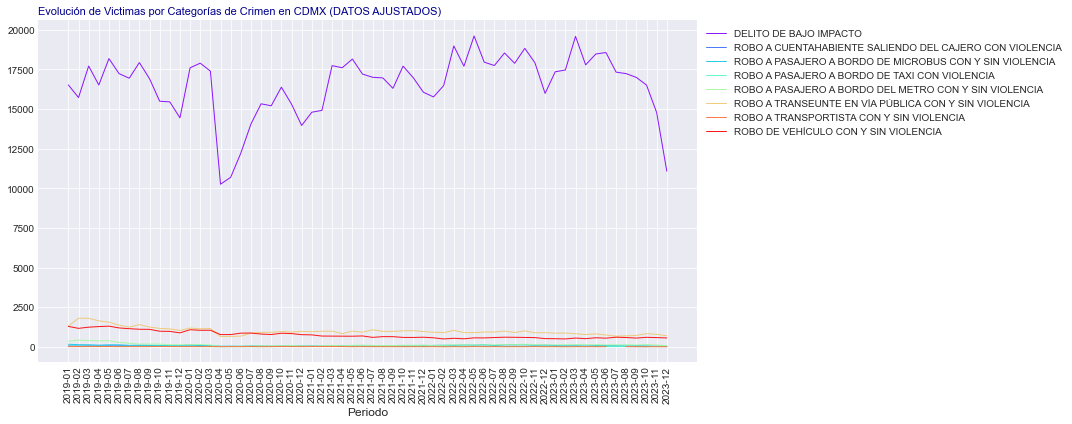

In [23]:
# Visualización

plt.style.use('seaborn-darkgrid') # 'ggplot', 'seaborn-darkgrid'

plt.figure( figsize = ( 15, 6 ) )

colors = cm.rainbow(np.linspace(0, 1, len(Time_Serie.columns) - 1))
 
# Plot multiple lines
for num, column in enumerate(Time_Serie.drop('Periodo', axis=1)):
    plt.plot(Time_Serie['Periodo'], Time_Serie[column], 
             marker='', color=colors[num], linewidth=1, 
             alpha=0.9, label=column)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
 
# Add titles
plt.title( 'Evolución de Victimas por Categorías de Crimen en CDMX (DATOS AJUSTADOS)', 
           loc = 'left', fontsize = 11, fontweight = 0, color = 'darkblue' )
plt.xlabel( 'Periodo' )
plt.ylabel( '' )

plt.xticks( rotation = 90 )

# Adjust layout to make room for the legend
plt.tight_layout()

In [24]:
#

Time_Serie = Time_Serie.drop('DELITO DE BAJO IMPACTO', axis=1)

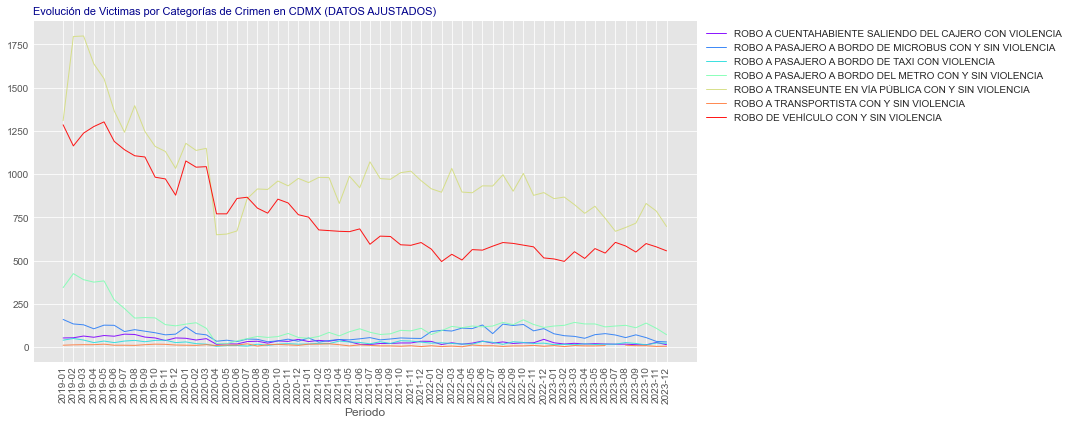

In [25]:
# Visualización

plt.style.use('ggplot') # 'ggplot', 'seaborn-darkgrid'

plt.figure( figsize = ( 15, 6 ) )

colors = cm.rainbow(np.linspace(0, 1, len(Time_Serie.columns) - 1))
 
# Plot multiple lines
for num, column in enumerate(Time_Serie.drop('Periodo', axis=1)):
    plt.plot(Time_Serie['Periodo'], Time_Serie[column], 
             marker='', color=colors[num], linewidth=1, 
             alpha=0.9, label=column)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
 
# Add titles
plt.title( 'Evolución de Victimas por Categorías de Crimen en CDMX (DATOS AJUSTADOS)', 
           loc = 'left', fontsize = 11, fontweight = 0, color = 'darkblue' )
plt.xlabel( 'Periodo' )
plt.ylabel( '' )

plt.xticks( rotation = 90 )

# Adjust layout to make room for the legend
plt.tight_layout()

In [26]:
#

Time_Serie_OLD = Time_Serie_OLD.drop('HECHO NO DELICTIVO', axis=1)
Time_Serie_OLD = Time_Serie_OLD.drop('SECUESTRO', axis=1)
Time_Serie_OLD = Time_Serie_OLD.drop('HOMICIDIO DOLOSO', axis=1)
Time_Serie_OLD = Time_Serie_OLD.drop('VIOLACIÓN', axis=1)
Time_Serie_OLD = Time_Serie_OLD.drop('LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO', axis=1)
Time_Serie_OLD = Time_Serie_OLD.drop('ROBO A CASA HABITACIÓN CON VIOLENCIA', axis=1)
Time_Serie_OLD = Time_Serie_OLD.drop('ROBO A NEGOCIO CON VIOLENCIA', axis=1)
Time_Serie_OLD = Time_Serie_OLD.drop('ROBO A REPARTIDOR CON Y SIN VIOLENCIA', axis=1)

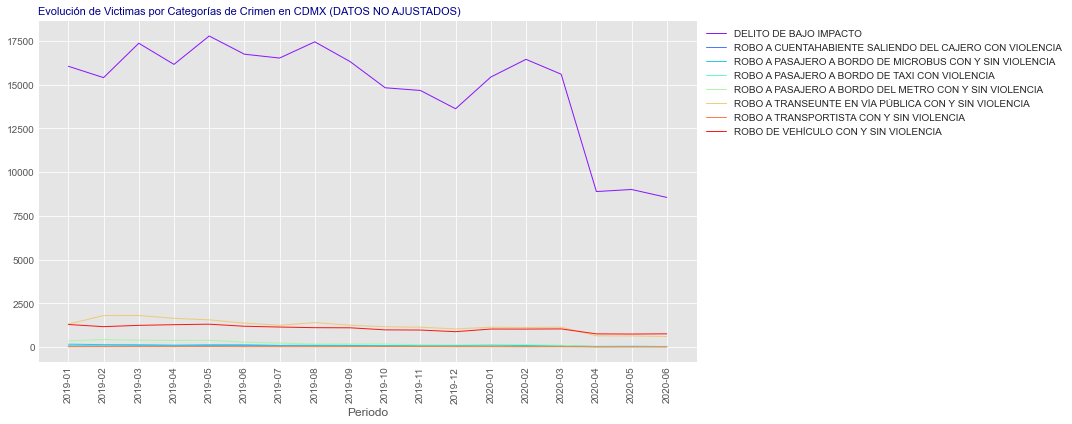

In [27]:
# Visualización

plt.style.use('ggplot') # 'ggplot', 'seaborn-darkgrid'

plt.figure( figsize = ( 15, 6 ) )

colors = cm.rainbow(np.linspace(0, 1, len(Time_Serie_OLD.columns) - 1))
 
# Plot multiple lines
for num, column in enumerate(Time_Serie_OLD.drop('Periodo', axis=1)):
    plt.plot(Time_Serie_OLD['Periodo'], Time_Serie_OLD[column], 
             marker='', color=colors[num], linewidth=1, 
             alpha=0.9, label=column)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
 
# Add titles
plt.title( 'Evolución de Victimas por Categorías de Crimen en CDMX (DATOS NO AJUSTADOS)', 
           loc = 'left', fontsize = 11, fontweight = 0, color = 'darkblue' )
plt.xlabel( 'Periodo' )
plt.ylabel( '' )

plt.xticks( rotation = 90 )

# Adjust layout to make room for the legend
plt.tight_layout()

In [28]:
#

Time_Serie_OLD = Time_Serie_OLD.drop('DELITO DE BAJO IMPACTO', axis=1)

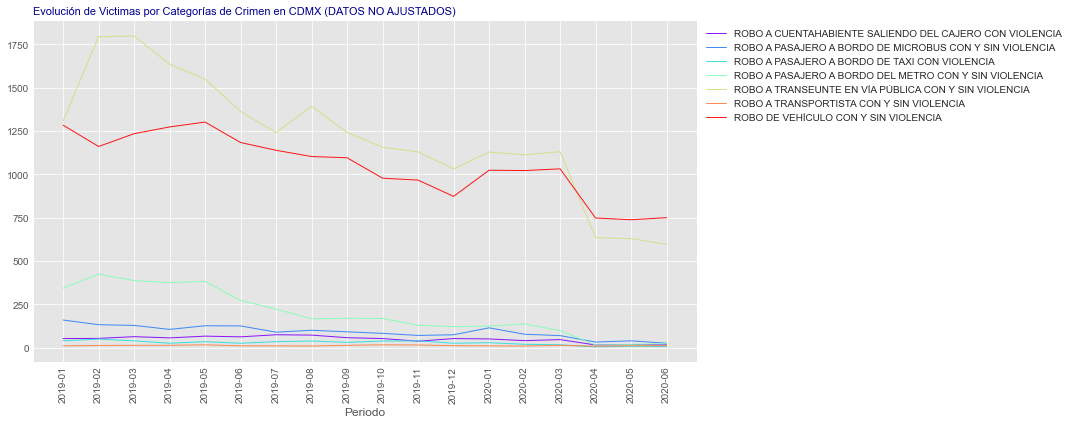

In [29]:
# Visualización

plt.style.use('ggplot') # 'ggplot', 'seaborn-darkgrid'

plt.figure( figsize = ( 15, 6 ) )

colors = cm.rainbow(np.linspace(0, 1, len(Time_Serie_OLD.columns) - 1))
 
# Plot multiple lines
for num, column in enumerate(Time_Serie_OLD.drop('Periodo', axis=1)):
    plt.plot(Time_Serie_OLD['Periodo'], Time_Serie_OLD[column], 
             marker='', color=colors[num], linewidth=1, 
             alpha=0.9, label=column)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
 
# Add titles
plt.title( 'Evolución de Victimas por Categorías de Crimen en CDMX (DATOS NO AJUSTADOS)', 
           loc = 'left', fontsize = 11, fontweight = 0, color = 'darkblue' )
plt.xlabel( 'Periodo' )
plt.ylabel( '' )

plt.xticks( rotation = 90 )

# Adjust layout to make room for the legend
plt.tight_layout()

## SECCIÓN II:

### Limpieza de datos

In [39]:
# Selección de información para el modelo
# Usaremos los DATOS ACTUALIZADOS:

Datos_ML = Datos[ Datos['Periodo'] >= '2019-01' ]

Datos_ML = Datos_ML[ [ 'Periodo','fecha_inicio', 'hora_inicio', 'fecha_hecho', 'hora_hecho', 'categoria_delito',
                       'sexo', 'edad', 'tipo_persona', 'calidad_juridica', 'latitud', 'longitud' ] ]

Datos_ML.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1197781 entries, 3 to 1229057
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Periodo           1197781 non-null  object 
 1   fecha_inicio      1197781 non-null  object 
 2   hora_inicio       1197780 non-null  object 
 3   fecha_hecho       1197781 non-null  object 
 4   hora_hecho        1197780 non-null  object 
 5   categoria_delito  1197781 non-null  object 
 6   sexo              984591 non-null   object 
 7   edad              791153 non-null   float64
 8   tipo_persona      1190919 non-null  object 
 9   calidad_juridica  1197780 non-null  object 
 10  latitud           1138911 non-null  float64
 11  longitud          1138911 non-null  float64
dtypes: float64(3), object(9)
memory usage: 118.8+ MB


In [40]:
#

Datos_ML.Periodo.value_counts()

Periodo
2019-05    24072
2019-03    23913
2019-08    23099
2019-01    22670
2022-05    22519
2019-04    22427
2019-06    22399
2023-03    22337
2019-07    22183
2022-03    21992
2022-10    21943
2020-02    21862
2019-02    21859
2019-09    21844
2020-01    21816
2022-08    21565
2020-03    21374
2021-05    21358
2023-05    21229
2023-06    21133
2021-03    20924
2022-06    20841
2022-09    20711
2022-11    20704
2021-10    20679
2022-07    20632
2021-04    20535
2022-04    20493
2023-04    20310
2021-06    20189
2023-02    20066
2021-07    19975
2021-11    19960
2021-08    19941
2023-01    19914
2023-07    19787
2023-08    19702
2019-10    19689
2020-10    19683
2023-10    19451
2019-11    19432
2023-09    19405
2021-09    19263
2022-02    19151
2021-12    18989
2022-12    18770
2020-11    18505
2022-01    18497
2020-08    18436
2020-09    18209
2019-12    18151
2021-02    18017
2021-01    17977
2023-11    17599
2020-07    17171
2020-12    17166
2020-06    15085
2023-12    13680
2020-0

In [41]:
#

Datos_ML.categoria_delito.value_counts()

categoria_delito
DELITO DE BAJO IMPACTO                                     993538
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA        59740
ROBO DE VEHÍCULO CON Y SIN VIOLENCIA                        45201
ROBO A NEGOCIO CON VIOLENCIA                                24407
HECHO NO DELICTIVO                                          20979
ROBO A REPARTIDOR CON Y SIN VIOLENCIA                       12084
VIOLACIÓN                                                    9945
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA        7824
HOMICIDIO DOLOSO                                             7109
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO                5877
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA      4410
ROBO A CASA HABITACIÓN CON VIOLENCIA                         2651
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA      1920
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA                1370
ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA                   

In [42]:
#

Datos_ML.tipo_persona.value_counts()

tipo_persona
FISICA    965190
MORAL     225729
Name: count, dtype: int64

In [43]:
#

pd.crosstab( Datos_ML['Periodo'], Datos_ML['tipo_persona'] , normalize = 'index' )

tipo_persona,FISICA,MORAL
Periodo,,
2019-01,0.800872,0.199128
2019-02,0.812520,0.187480
2019-03,0.802735,0.197265
2019-04,0.803620,0.196380
2019-05,0.803666,0.196334
2019-06,0.801474,0.198526
2019-07,0.776829,0.223171
2019-08,0.780991,0.219009
2019-09,0.783080,0.216920


In [44]:
#

Datos_ML = Datos_ML[ Datos_ML['tipo_persona'] != 'MORAL' ]

In [45]:
#

Datos_ML.calidad_juridica.value_counts()

calidad_juridica
VICTIMA Y DENUNCIANTE     514719
DENUNCIANTE Y VICTIMA     266243
VICTIMA                   100283
LESIONADO                  37754
CADAVER                    24775
OFENDIDO                   18673
OFENDIDO Y DENUNCIANTE      8137
AGRAVIADO                   1467
Name: count, dtype: int64

In [48]:
#
Datos_ML['personas'] = 'NA'
#
Datos_ML.loc[ Datos_ML['calidad_juridica'] == 'VICTIMA Y DENUNCIANTE', 'personas'] = 'Victima_y_Otra'
Datos_ML.loc[ Datos_ML['calidad_juridica'] == 'OFENDIDO Y DENUNCIANTE', 'personas'] = 'Victima_y_Otra'
Datos_ML.loc[ Datos_ML['calidad_juridica'] == 'DENUNCIANTE Y VICTIMA', 'personas'] = 'Victima_y_Otra'
#
Datos_ML.loc[ Datos_ML['calidad_juridica'] == 'VICTIMA', 'personas'] = 'Victima'
Datos_ML.loc[ Datos_ML['calidad_juridica'] == 'OFENDIDO', 'personas'] = 'Victima'
Datos_ML.loc[ Datos_ML['calidad_juridica'] == 'AGRAVIADO', 'personas'] = 'Victima'
Datos_ML.loc[ Datos_ML['calidad_juridica'] == 'LESIONADO', 'personas'] = 'Victima'
Datos_ML.loc[ Datos_ML['calidad_juridica'] == 'CADAVER', 'personas'] = 'Victima'

#Datos_ML.personas.value_counts()
Datos_ML = Datos_ML[ Datos_ML['personas'] != 'NA' ]

In [49]:
#

Datos_ML.personas.value_counts()

personas
Victima_y_Otra    789099
Victima           182952
Name: count, dtype: int64

In [50]:
# Creamos una variable de días

Datos_ML['Dias'] = ( pd.to_timedelta( 
                     pd.to_datetime( Datos_ML['fecha_inicio'] + '-' + Datos_ML['hora_inicio'],
                                     format = '%Y-%m-%d-%H:%M:%S' ) - \
                     pd.to_datetime( Datos_ML['fecha_hecho'] + '-' + Datos_ML['hora_hecho'], 
                                     format = '%Y-%m-%d-%H:%M:%S' ) 
                   ).dt.total_seconds() / 3600 ) / 24

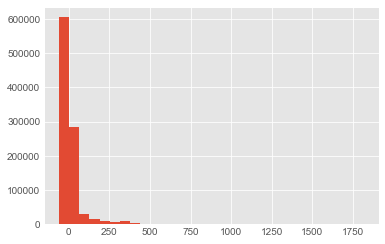

In [52]:
# Un histograma 

Datos_ML['Dias'].hist( bins = 30 )

plt.show()

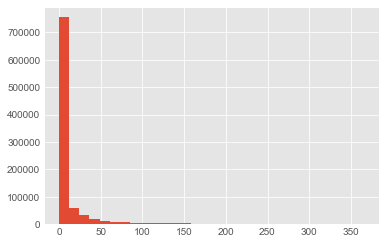

In [53]:
# Filtramos casos en los que no transcurrió más de 1 año entre la denuncia y el evento:

Datos_ML = Datos_ML[ ( Datos_ML['Dias'] >= 0 ) & ( Datos_ML['Dias'] <= 365 ) ]

Datos_ML['Dias'].hist( bins = 30 )

plt.show()

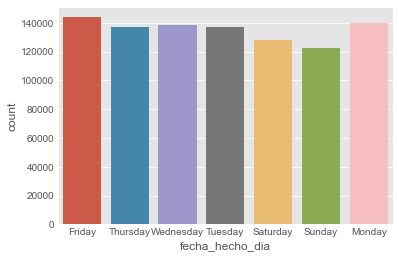

In [54]:
#
# Extraer el día de la semana 

Datos_ML['fecha_hecho_dia'] = pd.to_datetime( Datos_ML['fecha_hecho'] ).dt.day_name()

#Datos_ML['fecha_hecho_dia'].hist( bins = 7 )

sn.countplot(x = "fecha_hecho_dia",data=Datos_ML)

plt.show()

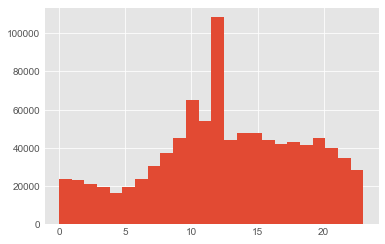

In [56]:
#
# Extraer hora

Datos_ML['hora_hecho_hora'] = pd.to_datetime( Datos_ML['hora_hecho'] ).dt.hour

Datos_ML['hora_hecho_hora'].hist( bins = 24 )

plt.show()

In [57]:
#

Datos_ML.sexo.value_counts()

sexo
Masculino    488333
Femenino     451148
Name: count, dtype: int64

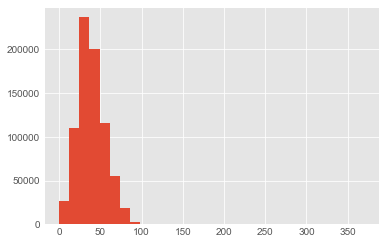

In [58]:
#

Datos_ML['edad'].hist( bins = 30 )

plt.show()

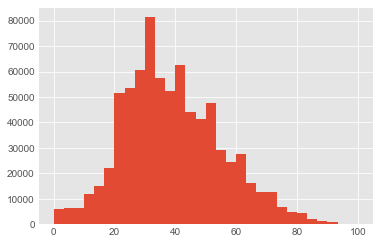

In [59]:
# Filtramos casos en los que no transcurrió más de 1 año entre la denuncia y el evento:

Datos_ML = Datos_ML[ ( Datos_ML['edad'] >= 0 ) & ( Datos_ML['edad'] <= 100 ) ]

Datos_ML['edad'].hist( bins = 30 )

plt.show()

In [60]:
# 

Datos_ML.info()

<class 'pandas.core.frame.DataFrame'>
Index: 763666 entries, 3 to 1229057
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Periodo           763666 non-null  object 
 1   fecha_inicio      763666 non-null  object 
 2   hora_inicio       763666 non-null  object 
 3   fecha_hecho       763666 non-null  object 
 4   hora_hecho        763666 non-null  object 
 5   categoria_delito  763666 non-null  object 
 6   sexo              762902 non-null  object 
 7   edad              763666 non-null  float64
 8   tipo_persona      763087 non-null  object 
 9   calidad_juridica  763666 non-null  object 
 10  latitud           733848 non-null  float64
 11  longitud          733848 non-null  float64
 12  personas          763666 non-null  object 
 13  Dias              763666 non-null  float64
 14  fecha_hecho_dia   763666 non-null  object 
 15  hora_hecho_hora   763666 non-null  int32  
dtypes: float64(4), int32(1),

In [61]:
# Filtramos casos en los que no hay datos de longitud y latitud:

#Datos_ML[ ( Datos_ML['latitud'].isnull() ) | ( Datos_ML['longitud'].isnull() ) ]

Datos_ML = Datos_ML[ ( Datos_ML['latitud'].notnull() ) | ( Datos_ML['longitud'].notnull() ) ]

Datos_ML.info()

<class 'pandas.core.frame.DataFrame'>
Index: 733848 entries, 3 to 1229057
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Periodo           733848 non-null  object 
 1   fecha_inicio      733848 non-null  object 
 2   hora_inicio       733848 non-null  object 
 3   fecha_hecho       733848 non-null  object 
 4   hora_hecho        733848 non-null  object 
 5   categoria_delito  733848 non-null  object 
 6   sexo              733127 non-null  object 
 7   edad              733848 non-null  float64
 8   tipo_persona      733307 non-null  object 
 9   calidad_juridica  733848 non-null  object 
 10  latitud           733848 non-null  float64
 11  longitud          733848 non-null  float64
 12  personas          733848 non-null  object 
 13  Dias              733848 non-null  float64
 14  fecha_hecho_dia   733848 non-null  object 
 15  hora_hecho_hora   733848 non-null  int32  
dtypes: float64(4), int32(1),

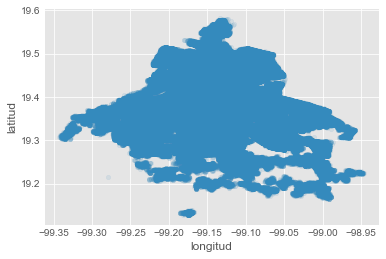

In [62]:
#

Datos_ML.plot(kind = 'scatter', x = 'longitud', y = 'latitud', alpha = 0.1)

plt.show()

In [63]:
#

Datos_ML = Datos_ML[ [ 'Periodo', 'categoria_delito', 'fecha_inicio', 'hora_inicio',
                       'fecha_hecho', 'hora_hecho', 'fecha_hecho_dia', 'hora_hecho_hora',
                       'sexo', 'edad', 'personas', 'Dias', 'latitud', 'longitud' ] ]

In [64]:
#

Datos.shape, Datos_ML.shape, 100 * Datos_ML.shape[0] / Datos.shape[0]

((1229058, 23), (733848, 14), 59.70816674233437)

## SECCIÓN III:

### Selección de datos

* Usemos los datos previos a Julio de 2020 para entrenar un modelo que permita clasificar "ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA"

In [65]:
# Agrupamos por año-mes y categoria_delito de los DATOS ACTUALIZADOS

Time_Serie_ML = Datos_ML[ ['Periodo', 'categoria_delito', 
                           'fecha_inicio'] ].groupby(
                                 by = ['Periodo','categoria_delito']
                           ).count().reset_index( drop = False).rename( 
                                   columns = {'categoria_delito': 'Categoria', 
                                              'fecha_inicio' : 'Numero'} )

Time_Serie_ML

,Periodo,Categoria,Numero
0,2019-01,DELITO DE BAJO IMPACTO,9889
1,2019-01,HECHO NO DELICTIVO,167
2,2019-01,HOMICIDIO DOLOSO,143
3,2019-01,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,71
4,2019-01,ROBO A CASA HABITACIÓN CON VIOLENCIA,45
...,...,...,...
923,2023-12,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,19
924,2023-12,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,567
925,2023-12,ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA,1
926,2023-12,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,439


In [66]:
#

Time_Serie_ML = pd.pivot_table( Time_Serie_ML, values = 'Numero', index = ['Periodo'], 
                                columns = ['Categoria'], aggfunc = 'sum' ).reset_index( drop = False )

Time_Serie_ML

Categoria,Periodo,DELITO DE BAJO IMPACTO,HECHO NO DELICTIVO,HOMICIDIO DOLOSO,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,ROBO A CASA HABITACIÓN CON VIOLENCIA,ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA,ROBO A NEGOCIO CON VIOLENCIA,ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA,ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA,ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SECUESTRO,VIOLACIÓN
0,2019-01,9889.0,167.0,143.0,71.0,45.0,41.0,330.0,138.0,33.0,285.0,99.0,1053.0,5.0,1098.0,15.0,58.0
1,2019-02,9757.0,198.0,129.0,85.0,64.0,45.0,268.0,113.0,46.0,339.0,65.0,1426.0,2.0,1015.0,2.0,74.0
2,2019-03,10821.0,141.0,145.0,75.0,57.0,51.0,269.0,97.0,32.0,306.0,57.0,1387.0,2.0,1070.0,6.0,87.0
3,2019-04,9993.0,171.0,138.0,65.0,56.0,43.0,237.0,79.0,17.0,295.0,50.0,1272.0,6.0,1055.0,1.0,94.0
4,2019-05,11193.0,172.0,183.0,72.0,59.0,53.0,233.0,104.0,26.0,281.0,59.0,1214.0,7.0,1073.0,8.0,87.0
5,2019-06,10583.0,153.0,128.0,42.0,51.0,44.0,281.0,98.0,22.0,209.0,49.0,1042.0,4.0,1013.0,8.0,79.0
6,2019-07,10016.0,147.0,144.0,60.0,60.0,60.0,384.0,73.0,28.0,163.0,47.0,963.0,2.0,961.0,7.0,93.0
7,2019-08,10774.0,159.0,108.0,67.0,56.0,59.0,315.0,83.0,33.0,118.0,62.0,1103.0,1.0,952.0,3.0,90.0
8,2019-09,10342.0,147.0,124.0,65.0,48.0,47.0,271.0,68.0,25.0,108.0,63.0,997.0,2.0,915.0,3.0,90.0
9,2019-10,9061.0,181.0,110.0,48.0,42.0,41.0,62.0,58.0,28.0,101.0,88.0,840.0,3.0,793.0,5.0,117.0


In [67]:
#
Time_Serie_ML = Time_Serie_ML.drop('HECHO NO DELICTIVO', axis=1)
Time_Serie_ML = Time_Serie_ML.drop('SECUESTRO', axis=1)
Time_Serie_ML = Time_Serie_ML.drop('HOMICIDIO DOLOSO', axis=1)
Time_Serie_ML = Time_Serie_ML.drop('VIOLACIÓN', axis=1)
Time_Serie_ML = Time_Serie_ML.drop('LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO', axis=1)
Time_Serie_ML = Time_Serie_ML.drop('ROBO A CASA HABITACIÓN CON VIOLENCIA', axis=1)
Time_Serie_ML = Time_Serie_ML.drop('ROBO A NEGOCIO CON VIOLENCIA', axis=1)
Time_Serie_ML = Time_Serie_ML.drop('ROBO A REPARTIDOR CON Y SIN VIOLENCIA', axis=1)

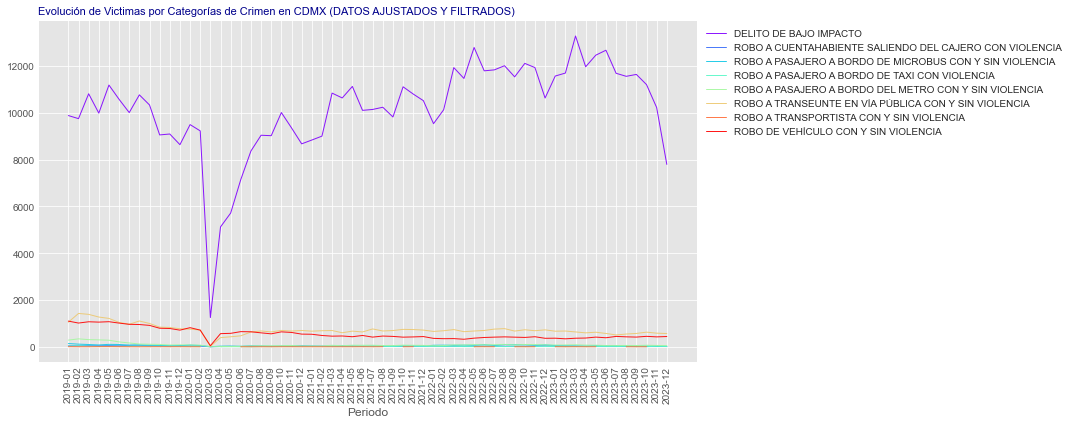

In [68]:
# Visualización

plt.style.use('ggplot') # 'ggplot', 'seaborn-darkgrid'

plt.figure( figsize = ( 15, 6 ) )

colors = cm.rainbow(np.linspace(0, 1, len(Time_Serie_ML.columns) - 1))
 
# Plot multiple lines
for num, column in enumerate(Time_Serie_ML.drop('Periodo', axis=1)):
    plt.plot(Time_Serie_ML['Periodo'], Time_Serie_ML[column], 
             marker='', color=colors[num], linewidth=1, 
             alpha=0.9, label=column)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
 
# Add titles
plt.title( 'Evolución de Victimas por Categorías de Crimen en CDMX (DATOS AJUSTADOS Y FILTRADOS)', 
           loc = 'left', fontsize = 11, fontweight = 0, color = 'darkblue' )
plt.xlabel( 'Periodo' )
plt.ylabel( '' )

plt.xticks( rotation = 90 )

# Adjust layout to make room for the legend
plt.tight_layout()

In [69]:
#

Time_Serie_ML = Time_Serie_ML.drop('DELITO DE BAJO IMPACTO', axis=1)

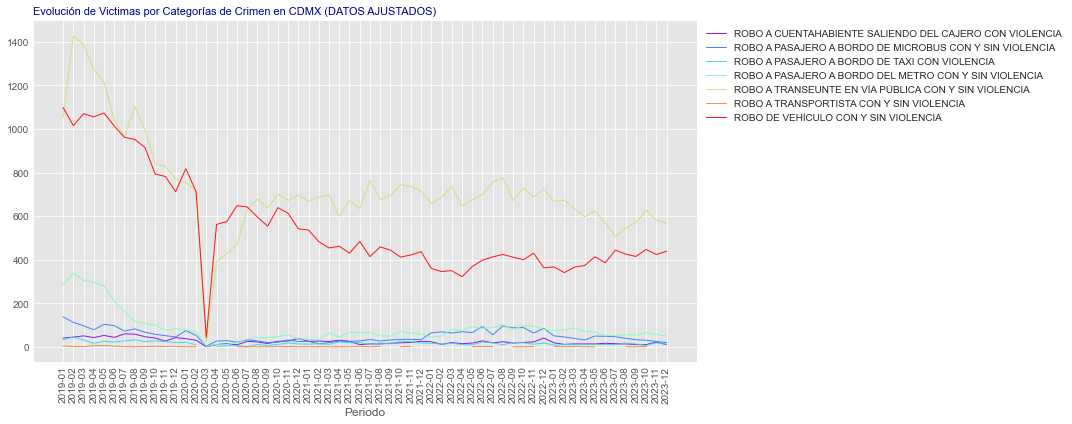

In [70]:
# Visualización

plt.style.use('ggplot') # 'ggplot', 'seaborn-darkgrid'

plt.figure( figsize = ( 15, 6 ) )

colors = cm.rainbow(np.linspace(0, 1, len(Time_Serie_ML.columns) - 1))
 
# Plot multiple lines
for num, column in enumerate(Time_Serie_ML.drop('Periodo', axis=1)):
    plt.plot(Time_Serie_ML['Periodo'], Time_Serie_ML[column], 
             marker='', color=colors[num], linewidth=1, 
             alpha=0.9, label=column)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
 
# Add titles
plt.title( 'Evolución de Victimas por Categorías de Crimen en CDMX (DATOS AJUSTADOS)', 
           loc = 'left', fontsize = 11, fontweight = 0, color = 'darkblue' )
plt.xlabel( 'Periodo' )
plt.ylabel( '' )

plt.xticks( rotation = 90 )

# Adjust layout to make room for the legend
plt.tight_layout()

In [71]:
# Selección de información para el modelo

# Usaremos los DATOS ACTUALIZADOS de 2019 como conjunto para entrenar y probar nuestro modelo:

Datos_01 = Datos_ML[ ( Datos_ML['Periodo'] >= '2019-01' ) & \
                     ( Datos_ML['Periodo'] <= '2019-12' ) ].reset_index( drop = True )

# Usaremos los DATOS ACTUALIZADOS de 2023 como conjunto para reclasificar delitos con nuestro modelo:

Datos_02 = Datos_ML[ ( Datos_ML['Periodo'] >= '2023-01' ) & \
                     ( Datos_ML['Periodo'] <= '2023-12' ) ].reset_index( drop = True )

#
Datos_01.shape, Datos_02.shape, 100*Datos_01.shape[0]/Datos_ML.shape[0], 100*Datos_02.shape[0]/Datos_ML.shape[0]

((158380, 14), (158496, 14), 21.582125998844447, 21.597933086960786)

In [72]:
#

Datos_01 = pd.concat( [ Datos_01, pd.get_dummies( Datos_01['sexo'], dtype = float) ], axis = 1 )

Datos_01 = pd.concat( [ Datos_01, pd.get_dummies( Datos_01['personas'], dtype = float) ], axis = 1 )

Datos_01 = pd.concat( [ Datos_01, pd.get_dummies( Datos_01['fecha_hecho_dia'].astype(str), dtype = float) ], axis = 1 )

Datos_01 = pd.concat( [ Datos_01, pd.get_dummies( Datos_01['hora_hecho_hora'].astype(str), dtype = float) ], axis = 1 )

Datos_01 = Datos_01[ [ 'Periodo', 'categoria_delito', 'fecha_hecho', 'hora_hecho', 
                       'fecha_hecho_dia', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
                       'Friday', 'Saturday', 'Sunday', 'hora_hecho_hora', '0', '1', '2', 
                       '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 
                       '15', '16', '17', '18', '19', '20', '21', '22', '23', 'Dias', 
                       'sexo', 'Femenino', 'Masculino', 'edad', 'personas', 'Victima', 
                       'Victima_y_Otra', 'latitud', 'longitud',] ]

In [73]:
#

Datos_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158380 entries, 0 to 158379
Data columns (total 47 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Periodo           158380 non-null  object 
 1   categoria_delito  158380 non-null  object 
 2   fecha_hecho       158380 non-null  object 
 3   hora_hecho        158380 non-null  object 
 4   fecha_hecho_dia   158380 non-null  object 
 5   Monday            158380 non-null  float64
 6   Tuesday           158380 non-null  float64
 7   Wednesday         158380 non-null  float64
 8   Thursday          158380 non-null  float64
 9   Friday            158380 non-null  float64
 10  Saturday          158380 non-null  float64
 11  Sunday            158380 non-null  float64
 12  hora_hecho_hora   158380 non-null  int32  
 13  0                 158380 non-null  float64
 14  1                 158380 non-null  float64
 15  2                 158380 non-null  float64
 16  3                 15

In [74]:
#

Datos_02 = pd.concat( [ Datos_02, pd.get_dummies( Datos_02['sexo'], dtype = float) ], axis = 1 )

Datos_02 = pd.concat( [ Datos_02, pd.get_dummies( Datos_02['personas'], dtype = float) ], axis = 1 )

Datos_02 = pd.concat( [ Datos_02, pd.get_dummies( Datos_02['fecha_hecho_dia'].astype(str), dtype = float) ], axis = 1 )

Datos_02 = pd.concat( [ Datos_02, pd.get_dummies( Datos_02['hora_hecho_hora'].astype(str), dtype = float) ], axis = 1 )

Datos_02 = Datos_02[ [ 'Periodo', 'categoria_delito', 'fecha_hecho', 'hora_hecho', 
                       'fecha_hecho_dia', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
                       'Friday', 'Saturday', 'Sunday', 'hora_hecho_hora', '0', '1', '2', 
                       '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 
                       '15', '16', '17', '18', '19', '20', '21', '22', '23', 'Dias', 
                       'sexo', 'Femenino', 'Masculino', 'edad', 'personas', 'Victima', 
                       'Victima_y_Otra', 'latitud', 'longitud',] ]

In [75]:
#

Datos_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158496 entries, 0 to 158495
Data columns (total 47 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Periodo           158496 non-null  object 
 1   categoria_delito  158496 non-null  object 
 2   fecha_hecho       158496 non-null  object 
 3   hora_hecho        158496 non-null  object 
 4   fecha_hecho_dia   158496 non-null  object 
 5   Monday            158496 non-null  float64
 6   Tuesday           158496 non-null  float64
 7   Wednesday         158496 non-null  float64
 8   Thursday          158496 non-null  float64
 9   Friday            158496 non-null  float64
 10  Saturday          158496 non-null  float64
 11  Sunday            158496 non-null  float64
 12  hora_hecho_hora   158496 non-null  int32  
 13  0                 158496 non-null  float64
 14  1                 158496 non-null  float64
 15  2                 158496 non-null  float64
 16  3                 15

In [77]:
#

Datos_01.describe()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,hora_hecho_hora,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,Dias,Femenino,Masculino,edad,Victima,Victima_y_Otra,latitud,longitud
count,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000,158380.000000
mean,0.144665,0.146066,0.144128,0.144204,0.153271,0.140428,0.127238,13.595056,0.020362,0.018273,0.015090,0.014465,0.012754,0.016063,0.024403,0.032776,0.039683,0.044570,0.055493,0.054066,0.075950,0.054691,0.058101,0.058391,0.054502,0.050612,0.054167,0.053132,0.058644,0.052772,0.045833,0.035206,8.717484,0.448737,0.548807,39.210317,0.191615,0.808385,19.384425,-99.135133
std,0.351764,0.353174,0.351221,0.351297,0.360249,0.347432,0.333241,5.853857,0.141237,0.133936,0.121913,0.119399,0.112212,0.125717,0.154298,0.178049,0.195214,0.206358,0.228941,0.226149,0.264919,0.227377,0.233935,0.234482,0.227006,0.219206,0.226348,0.224297,0.234957,0.223578,0.209123,0.184302,30.986192,0.497367,0.497614,15.897564,0.393573,0.393573,0.071327,0.061790
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.130790,-99.341145
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.171528,0.000000,0.000000,28.000000,0.000000,1.000000,19.335230,-99.175860
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.786111,0.000000,1.000000,37.000000,0.000000,1.000000,19.385200,-99.140073
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.258073,1.000000,1.000000,49.000000,0.000000,1.000000,19.437510,-99.095149
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,364.998611,1.000000,1.000000,100.000000,1.000000,1.000000,19.581110,-98.948320


In [78]:
#

Datos_02.describe()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,hora_hecho_hora,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,Dias,Femenino,Masculino,edad,Victima,Victima_y_Otra,latitud,longitud
count,158496.000000,158496.000000,158496.000000,158496.000000,158496.000000,158496.000000,158496.000000,158496.000000,158496.000000,158496.000000,158496.000000,158496.000000,158496.000000,158496.000000,158496.000000,158496.000000,158496.000000,158496.000000,158496.000000,158496.000000,158496.000000,158496.000000,158496.000000,158496.000000,158496.000000,158496.000000,158496.000000,158496.000000,158496.000000,158496.000000,158496.000000,158496.000000,158496.000000,158496.000000,158496.000000,158496.000000,158496.000000,158496.000000,158496.000000,158496.000000
mean,0.145644,0.142735,0.146149,0.143316,0.145101,0.134931,0.142123,12.213621,0.016171,0.030985,0.028846,0.026354,0.023281,0.026947,0.031654,0.040916,0.049282,0.053995,0.068040,0.063560,0.084564,0.041818,0.046626,0.045755,0.044253,0.042537,0.041749,0.042335,0.048392,0.040815,0.033433,0.027692,8.385216,0.523931,0.475999,39.289061,0.136634,0.863366,19.381298,-99.134918
std,0.352750,0.349804,0.353256,0.350396,0.352204,0.341651,0.349178,6.059768,0.126132,0.173278,0.167375,0.160186,0.150796,0.161929,0.175077,0.198096,0.216457,0.226009,0.251815,0.243968,0.278232,0.200174,0.210837,0.208954,0.205658,0.201812,0.200015,0.201354,0.214595,0.197862,0.179765,0.164088,24.907238,0.499429,0.499425,16.191432,0.343462,0.343462,0.073608,0.063820
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.126574,-99.341338
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.274534,0.000000,0.000000,28.000000,0.000000,1.000000,19.328725,-99.174992
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.299803,1.000000,0.000000,37.000000,0.000000,1.000000,19.383542,-99.138232
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.563738,1.000000,1.000000,50.000000,0.000000,1.000000,19.436420,-99.093867
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,360.536493,1.000000,1.000000,100.000000,1.000000,1.000000,19.579410,-98.948363


## SECCIÓN IV:

### Modelado

* Usemos los datos previos a Julio de 2020 para entrenar un modelo que permita clasificar "ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA"

* Plantearemos un modelo de respuesta binaria:

Este tipo de modelos suponene que existe una variable latente que se puede expresar como una ecuación lineal dada por:
$$y^*_i = \mathbf{x}_i \boldsymbol{\beta} + \varepsilon_i$$

Donde $\varepsilon_i$ es una variable aleatoria con función de densidad con media cero y distribución simetrica al rededor de cero. Dado lo anterior, para nosotros sólo es visible que:
\begin{equation*}
    y_i = 
    \begin{cases}
        1 & \text{si } y^*_i > 0 \\
        0 & \text{si } y^*_i < 0 
    \end{cases}
\end{equation*}

Visto en nuestro caso, podemos pensar que estamos ante algo como:
\begin{equation*}
    y_i = 
    \begin{cases}
        \text{ ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA } & \text{si } y^*_i > 0 \\
        \text{ OTRO CASO } & \text{si } y^*_i < 0 
    \end{cases}
\end{equation*}

De esta forma tenemos una estrucutura de la probabilidad dada por:
\begin{eqnarray*}
    P(y_i = 1 | \mathbf{x}_i) & = & P(\mathbf{x}_i \boldsymbol{\beta} + \varepsilon_i > 0) = P(\varepsilon_i > - \mathbf{x}_i \boldsymbol{\beta}) = G(\mathbf{x}_i \boldsymbol{\beta}) \\
    P(y_i = 0 | \mathbf{x}_i) & = & P(\mathbf{x}_i \boldsymbol{\beta} + \varepsilon_i < 0) = P(\varepsilon_i < - \mathbf{x}_i \boldsymbol{\beta}) = 1 - G(\mathbf{x}_i \boldsymbol{\beta})
\end{eqnarray*}

Donde $\mathbf{x}_i$ es un vector de dimensión $K \times 1$ que contiene al menos el término constante y $\boldsymbol{\beta}$ es un vector de parámetros a estimar, de forma que asumiremos:
\begin{equation*}
    \mathbf{x}_i \boldsymbol{\beta} = \beta_1 + x_{i2} \beta_2 + \ldots + x_{iK} \beta_K
\end{equation*}

Asumiremos que $G(\cdot)$ es uan función de densidad acumulada de forma que:
\begin{equation*}
    0< G(\mathbf{x}_i \boldsymbol{\beta}) < 1 \text{ , } \forall \mathbf{x}_i \boldsymbol{\beta} \in \mathbb{R}
\end{equation*}

En este caso utilizaremos dos modelos que dependen de la forma funcional de $G(\cdot)$ que está determinada por la distribución de $\varepsilon_i$. De esta forma tendremos dos modelos: Probit y Logit.

In [79]:
# Seleccionamos solo los casos de interés para Dataset 01

Datos_01 = Datos_01[ ( Datos_01['categoria_delito'] == 'DELITO DE BAJO IMPACTO' ) | \
                     ( Datos_01['categoria_delito'] == 'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA' ) ]

# Variable categórica:
Datos_01[ 'Delito' ] = 0

Datos_01.loc[ Datos_01['categoria_delito'] == 'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA', 'Delito'] = 1

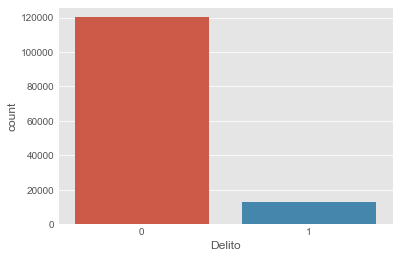

In [81]:
#

sn.countplot( x = 'Delito', data = Datos_01)

plt.show()

In [82]:
#
Datos_01.Delito.describe()

count    133067.000000
mean          0.096906
std           0.295831
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Delito, dtype: float64

In [83]:
# Seleccionamos solo los casos de interés para Dataset 02

Datos_02 = Datos_02[ ( Datos_02['categoria_delito'] == 'DELITO DE BAJO IMPACTO' ) | \
                     ( Datos_02['categoria_delito'] == 'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA' ) ]

# Variable categórica:
Datos_02[ 'Delito' ] = 0

Datos_02.loc[ Datos_02['categoria_delito'] == 'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA', 'Delito'] = 1

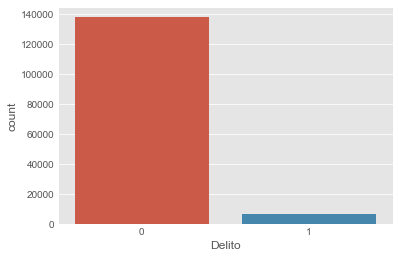

In [84]:
#

sn.countplot( x = 'Delito', data = Datos_02)

plt.show()

In [85]:
#
Datos_02.Delito.describe()

count    145026.000000
mean          0.049384
std           0.216670
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Delito, dtype: float64

### Logistic Regression
Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used to for prediction and also calculating the probability of success.

In [86]:
# Add constant

Datos_01[ 'Constante' ] = 1 

In [87]:
# Selecciones las columnas de nuestra regresión:

Datos_01.columns

Index(['Periodo', 'categoria_delito', 'fecha_hecho', 'hora_hecho',
       'fecha_hecho_dia', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday', 'Sunday', 'hora_hecho_hora', '0', '1', '2', '3',
       '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
       '17', '18', '19', '20', '21', '22', '23', 'Dias', 'sexo', 'Femenino',
       'Masculino', 'edad', 'personas', 'Victima', 'Victima_y_Otra', 'latitud',
       'longitud', 'Delito', 'Constante'],
      dtype='object')

In [89]:
# Model

model = sm.Logit( 
    Datos_01.Delito, # Y
    Datos_01[[ 'Constante', 
               'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', # Quitamos el domingo
               '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 
               '15', '16', '17', '18', '19', '20', '21', '22', '23', # Quitamos la hora 0
               'Femenino', # Quitamos la dummy de masculino
               'Victima', # Quitamos la dummy de cuando la denuncia la hace alguien más que la victima
               'Dias', 'edad', 'latitud', 'longitud']]
)

result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.281793
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Delito   No. Observations:               133067
Model:                          Logit   Df Residuals:                   133031
Method:                           MLE   Df Model:                           35
Date:                Sat, 03 Feb 2024   Pseudo R-squ.:                  0.1145
Time:                        09:44:54   Log-Likelihood:                -37497.
converged:                       True   LL-Null:                       -42346.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Constante    372.5574     15.873     23.472      0.000     341.448     403.667
Monday         0.3152      0.038      8.316      0.000       0.241       0.390
Tuesday        0.2233      0.038      5.816      0.000       0.148       0.299
Wednesday      0.2194      0.039      5.685      0.000       0.144       0.295
Thursday       0.2245      0.039      5.815      0.000       0.149       0.300
Friday         0.2056      0.038      5.433      0.000       0.131       0.280
Saturday       0.1870      0.038      4.861      0.000       0.112       0.262
1             -0.1352      0.094     -1.431      0.152      -0.320       0.050
2             -0.2086      0.103     -2.029      0.043      -0.410      -0.007
3             -0.3302      0.105     -3.130      0.002      -0.537      -0.123
4             -0.0119      0.102     -0.116      0.907      -0.212       0.188
5              0.2423      0.094      2.586      0.010       0.059       0.426
6              0.2546      0.084      3.021      0.003       0.089       0.420
7             -0.2405      0.085     -2.834      0.005      -0.407      -0.074
8             -0.4448      0.084     -5.299      0.000      -0.609      -0.280
9             -0.5092      0.083     -6.134      0.000      -0.672      -0.346
10            -0.4876      0.080     -6.085      0.000      -0.645      -0.331
11            -0.3159      0.078     -4.036      0.000      -0.469      -0.162
12            -0.4543      0.077     -5.904      0.000      -0.605      -0.303
13            -0.0145      0.076     -0.192      0.848      -0.163       0.134
14            -0.1659      0.076     -2.182      0.029      -0.315      -0.017
15            -0.1340      0.076     -1.771      0.077      -0.282       0.014
16            -0.1486      0.076     -1.946      0.052      -0.298       0.001
17            -0.2353      0.078     -3.013      0.003      -0.388      -0.082
18            -0.3019      0.078     -3.875      0.000      -0.455      -0.149
19            -0.0866      0.076     -1.138      0.255      -0.236       0.063
20            -0.0442      0.075     -0.590      0.555      -0.191       0.102
21             0.0875      0.075      1.166      0.244      -0.060       0.235
22             0.0207      0.077      0.270      0.787      -0.129       0.171
23             0.0036      0.080      0.045      0.964      -0.153       0.161
Femenino      -0.7415      0.020    -36.951      0.000      -0.781      -0.702
Victima       -2.2916      0.048    -48.030      0.000      -2.385      -2.198
Dias          -0.0248      0.001    -20.197      0.000      -0.027      -0.022
edad          -0.0350      0.001    -45.831      0.000      -0.037      -0.034
latitud        2.7910      0.142     19.720      0.000       2.514       3.068
longitud       4.3072      0.164     26.334      0.000       3.987       4.628
==============================================================================
"""

In [90]:
#

print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                 Delito   No. Observations:               133067
Model:                          Logit   Df Residuals:                   133031
Method:                           MLE   Df Model:                           35
Date:                Sat, 03 Feb 2024   Pseudo R-squ.:                  0.1145
Time:                        09:49:51   Log-Likelihood:                -37497.
converged:                       True   LL-Null:                       -42346.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Constante    372.5574     15.873     23.472      0.000     341.448     403.667
Monday         0.3152      0.038      8.316      0.000       0.241       0.390
Tuesday        0.2233      0.038      5.816      0.0

In [94]:
#

Datos_01_train, Datos_01_test = train_test_split( Datos_01[ Datos_01['Delito'] == 0 ], 
                                                  test_size = 0.68, random_state = 42 )

Datos_01_train = pd.concat( [ Datos_01[ Datos_01['Delito'] == 1 ], Datos_01_train ], ignore_index = True )

#Datos_01_train

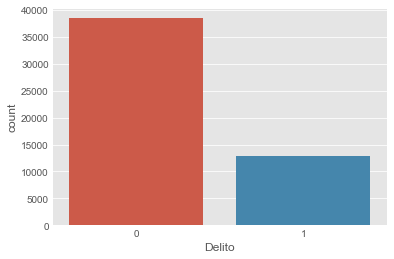

In [95]:
#

sn.countplot( x = 'Delito', data = Datos_01_train)

plt.show()

In [96]:
#
Datos_01_train.Delito.describe()

count    51350.000000
mean         0.251120
std          0.433661
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Delito, dtype: float64

In [97]:
#
Datos_01_train.describe()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,hora_hecho_hora,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,Dias,Femenino,Masculino,edad,Victima,Victima_y_Otra,latitud,longitud,Delito,Constante
count,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.000000,51350.0
mean,0.146056,0.146368,0.143038,0.142395,0.154528,0.142142,0.125472,13.690185,0.019357,0.017683,0.014742,0.013301,0.012717,0.015209,0.022726,0.031159,0.037644,0.043135,0.055463,0.055054,0.076981,0.056319,0.060701,0.059396,0.057799,0.050730,0.053982,0.051665,0.059552,0.053749,0.046329,0.034606,8.621312,0.464284,0.533165,38.375073,0.166310,0.833690,19.385811,-99.134338,0.251120,1.0
std,0.353166,0.353478,0.350115,0.349459,0.361457,0.349199,0.331257,5.790775,0.137779,0.131796,0.120519,0.114561,0.112050,0.122386,0.149031,0.173748,0.190335,0.203164,0.228883,0.228087,0.266565,0.230540,0.238784,0.236367,0.233366,0.219449,0.225985,0.221352,0.236657,0.225523,0.210199,0.182781,30.781959,0.498728,0.498904,15.639999,0.372362,0.372362,0.070578,0.061564,0.433661,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.130893,-99.339686,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.161111,0.000000,0.000000,27.000000,0.000000,1.000000,19.337950,-99.175150,0.000000,1.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.804763,0.000000,1.000000,36.000000,0.000000,1.000000,19.387240,-99.139110,0.000000,1.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.308576,1.000000,1.000000,48.000000,0.000000,1.000000,19.437931,-99.094853,1.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,364.994954,1.000000,1.000000,100.000000,1.000000,1.000000,19.579550,-98.949310,1.000000,1.0


In [98]:
#
Datos_01.describe()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,hora_hecho_hora,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,Dias,Femenino,Masculino,edad,Victima,Victima_y_Otra,latitud,longitud,Delito,Constante
count,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.000000,133067.0
mean,0.144784,0.146212,0.143604,0.142552,0.153652,0.141154,0.128041,13.619718,0.019171,0.017487,0.014316,0.013790,0.011874,0.013707,0.021515,0.030443,0.037973,0.045383,0.058542,0.056490,0.082297,0.057107,0.060887,0.060571,0.056618,0.051485,0.054409,0.052440,0.056753,0.049501,0.043925,0.033314,9.707289,0.486822,0.510630,39.405720,0.192933,0.807067,19.384204,-99.136739,0.096906,1.0
std,0.351884,0.353320,0.350689,0.349617,0.360616,0.348182,0.334136,5.719114,0.137126,0.131079,0.118791,0.116619,0.108318,0.116274,0.145096,0.171804,0.191133,0.208144,0.234766,0.230867,0.274818,0.232047,0.239123,0.238543,0.231112,0.220986,0.226823,0.222913,0.231372,0.216913,0.204930,0.179456,32.860130,0.499828,0.499889,16.143771,0.394602,0.394602,0.071028,0.061567,0.295831,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.130790,-99.341145,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.187894,0.000000,0.000000,28.000000,0.000000,1.000000,19.335170,-99.176840,0.000000,1.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.888090,0.000000,1.000000,38.000000,0.000000,1.000000,19.385430,-99.141580,0.000000,1.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.933501,1.000000,1.000000,50.000000,0.000000,1.000000,19.437022,-99.097415,0.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,364.994954,1.000000,1.000000,100.000000,1.000000,1.000000,19.581110,-98.948320,1.000000,1.0


In [99]:
# Model

model_adj = sm.Logit( 
    Datos_01_train.Delito,
    Datos_01_train[[ 'Constante', 
                     'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', # Quitamos el domingo
                     '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 
                     '15', '16', '17', '18', '19', '20', '21', '22', '23', # Quitamos la hora 0
                     'Femenino', # Quitamos la dummy de masculino
                     'Victima', # Quitamos la dummy de cuando la denuncia la hace alguien más que la victima
                     'Dias', 'edad', 'latitud', 'longitud']]
)

result_adj = model_adj.fit()
print(result_adj.summary())

Optimization terminated successfully.
         Current function value: 0.486255
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 Delito   No. Observations:                51350
Model:                          Logit   Df Residuals:                    51314
Method:                           MLE   Df Model:                           35
Date:                Sat, 03 Feb 2024   Pseudo R-squ.:                  0.1372
Time:                        10:03:15   Log-Likelihood:                -24969.
converged:                       True   LL-Null:                       -28939.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Constante    363.5355     18.065     20.124      0.000     328.129     398.942
Monday         0.3389      0.

### Interpreting the results: Odds Ratio, Confidence Intervals and Pvalues

In [100]:
#

params         = np.exp( result_adj.params ) # Extraemos los paramétros y los elevamos al número e
conf           = np.exp( result_adj.conf_int() )
conf['OR']     = params
pvalue         = round(result_adj.pvalues, 3)
conf['pvalue'] = pvalue
conf.columns   = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']

conf

,CI 95%(2.5%),CI 95%(97.5%),Odds Ratio,pvalue
Constante,3.197596e+142,1.811918e+173,7.611689e+157,0.000
Monday,1.289924e+00,1.526873e+00,1.403406e+00,0.000
Tuesday,1.189007e+00,1.409660e+00,1.294641e+00,0.000
Wednesday,1.173983e+00,1.393190e+00,1.278898e+00,0.000
Thursday,1.186977e+00,1.408588e+00,1.293044e+00,0.000
Friday,1.151003e+00,1.361299e+00,1.251742e+00,0.000
Saturday,1.138210e+00,1.349889e+00,1.239539e+00,0.000
1,6.962041e-01,1.069070e+00,8.627229e-01,0.177
2,5.991254e-01,9.493977e-01,7.541938e-01,0.016
3,5.838328e-01,9.383691e-01,7.401693e-01,0.013


### Implementemos / entrenemos nuestro modelo

In [101]:
#

X = Datos_01_train[[ 'Constante', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 
                     '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 
                     '15', '16', '17', '18', '19', '20', '21', '22', '23', 
                     'Femenino', 'Victima', 'Dias', 'edad', 'latitud', 'longitud']]
y = Datos_01_train.Delito

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.20, random_state = 5)

In [102]:
# Del sklearn

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [103]:
# Model accuracy

accuracy_score( y_test, y_pred )

0.7542356377799416

In [105]:
# Confusion matrix

cm = confusion_matrix( y_test, y_pred )

conf_matrix = pd.DataFrame( data = cm, 
                            columns = ['Predicted:0','Predicted:1'],
                            index = ['Actual:0','Actual:1'] )

conf_matrix

,Predicted:0,Predicted:1
Actual:0,7316,344
Actual:1,2180,430


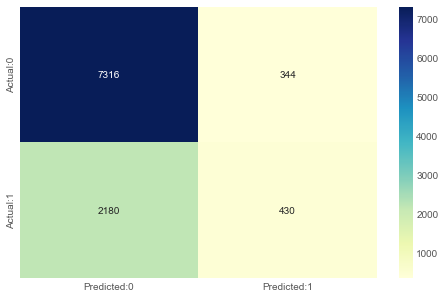

In [106]:
#

plt.figure( figsize = (8,5) )

sn.heatmap( conf_matrix, annot = True, fmt = 'd', cmap = "YlGnBu" )

plt.show()

In [107]:
# accuracy

(7316 + 430) / (7316 + 430 + 344 + 2180)

0.7542356377799416

In [108]:
# Model Evaluation - Statistics

TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.7542356377799416 
 The Missclassification = 1-Accuracy =  0.24576436222005837 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.16475095785440613 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9550913838120104 
 Positive Predictive value = TP/(TP+FP) =  0.5555555555555556 
 Negative predictive Value = TN/(TN+FN) =  0.7704296545914069 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  3.668582375478925 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.8745226439085906


In [109]:
# Calculamos las probabiliades:

y_pred_prob    = logreg.predict_proba( X_test )[: , :]

y_pred_prob_df = pd.DataFrame( data = y_pred_prob, 
                               columns = ['Prob de delito bajo impacto (0)','Prob de robo (1)'] )

y_pred_prob_df.head()

,Prob de delito bajo impacto (0),Prob de robo (1)
0,0.896218,0.103782
1,0.960139,0.039861
2,0.623051,0.376949
3,0.457581,0.542419
4,0.681985,0.318015


### ROC curve

Una forma común de visualizar las compensaciones de diferentes umbrales es mediante el uso de una curva ROC, un gráfico de la tasa de verdaderos positivos (# verdaderos positivos/# total de positivos) versus la tasa de falsos positivos (# falsos positivos/# total de negativos) para todas las opciones posibles de umbrales. Un modelo con buena precisión de clasificación debería tener significativamente más positivos verdaderos que falsos positivos en todos los umbrales.

La posición óptima para la curva roc es hacia la esquina superior izquierda, donde la especificidad y la sensibilidad están en niveles óptimos.

Área bajo la curva (AUC). El área bajo la curva ROC cuantifica la precisión de la clasificación del modelo; cuanto mayor sea el área, mayor será la disparidad entre los verdaderos y falsos positivos, y más fuerte será el modelo para clasificar los miembros del conjunto de datos de entrenamiento. Un área de 0,5 corresponde a un modelo que no funciona mejor que la clasificación aleatoria y un buen clasificador se mantiene lo más lejos posible de eso. Un área de 1 es ideal. Cuanto más cerca esté el AUC de 1, mejor.

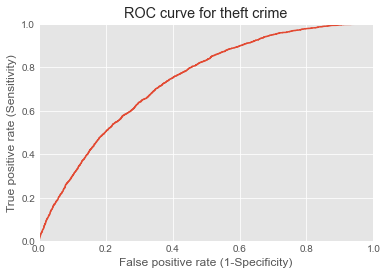

In [110]:
#

fpr, tpr, thresholds = roc_curve( y_test, y_pred_prob_df.iloc[:,1] )

#
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for theft crime')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [111]:
#

roc_auc_score(y_test, y_pred_prob_df.iloc[:,1])

0.7380632333963566

## SECCIÓN V:

### Prediciendo sobre el dataset que queremos clasificar

* Usemos los datos de 2023 para clasificar "ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA"

In [112]:
# Seleccionamos solo los casos de interés para Dataset 02

Datos_02 = Datos_02[ ( Datos_02['categoria_delito'] == 'DELITO DE BAJO IMPACTO' ) | \
                     ( Datos_02['categoria_delito'] == 'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA' ) ]

# Variable categórica:
Datos_02[ 'Delito' ] = 0

Datos_02.loc[ Datos_02['categoria_delito'] == 'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA', 'Delito'] = 1

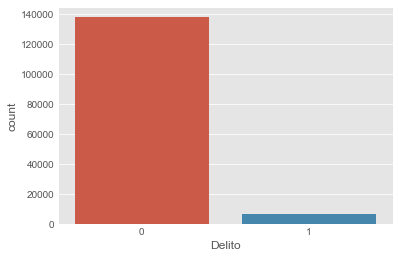

In [113]:
#

sn.countplot( x = 'Delito', data = Datos_02)

plt.show()

In [114]:
#

Datos_02.describe()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,hora_hecho_hora,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,Dias,Femenino,Masculino,edad,Victima,Victima_y_Otra,latitud,longitud,Delito
count,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000,145026.000000
mean,0.146146,0.143085,0.146008,0.143347,0.145208,0.134321,0.141885,12.171004,0.014742,0.031022,0.028533,0.026306,0.023154,0.026547,0.031077,0.040627,0.049377,0.055183,0.070249,0.065995,0.087977,0.042206,0.046950,0.046137,0.043820,0.042372,0.041296,0.041634,0.047219,0.039234,0.032036,0.026306,8.750033,0.542820,0.457118,39.286590,0.110759,0.889241,19.381634,-99.135940,0.049384
std,0.353254,0.350160,0.353116,0.350427,0.352312,0.340998,0.348933,5.991771,0.120520,0.173378,0.166490,0.160043,0.150394,0.160756,0.173527,0.197426,0.216655,0.228338,0.255568,0.248274,0.283263,0.201060,0.211533,0.209781,0.204695,0.201436,0.198975,0.199752,0.212108,0.194153,0.176095,0.160043,25.395881,0.498165,0.498159,16.038368,0.313835,0.313835,0.073193,0.063599,0.216670
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.126574,-99.341338,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.315501,0.000000,0.000000,28.000000,0.000000,1.000000,19.329365,-99.175759,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.438009,1.000000,0.000000,37.000000,0.000000,1.000000,19.384348,-99.139318,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.866936,1.000000,1.000000,50.000000,0.000000,1.000000,19.436394,-99.095152,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,360.536493,1.000000,1.000000,99.000000,1.000000,1.000000,19.579410,-98.948363,1.000000


In [115]:
#

Datos_02[ 'Constante' ] = 1

X_New = Datos_02[[ 'Constante', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 
                   '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 
                   '15', '16', '17', '18', '19', '20', '21', '22', '23', 
                   'Femenino', 'Victima', 'Dias', 'edad', 'latitud', 'longitud']]

Datos_02[ 'Delito_Predict' ] = logreg.predict(X_New)

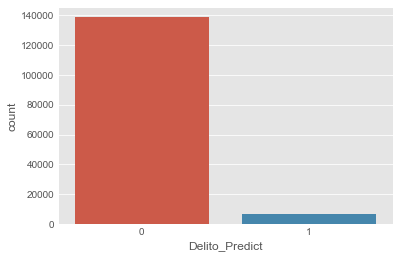

In [116]:
#

sn.countplot( x = 'Delito_Predict', data = Datos_02)

plt.show()

In [117]:
#

Datos_02[ ['Delito', 'Delito_Predict'] ].describe()

,Delito,Delito_Predict
count,145026.000000,145026.000000
mean,0.049384,0.045509
std,0.216670,0.208419
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000
